In [19]:
from scipy.io import loadmat
import mne
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy import signal

loadmat("C:/Users/ozlem/OneDrive/Masaüstü/BCI/8EMG_Arm_Kreisbewegung2021.mat")

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Wed Apr 21 16:42:25 2021',
 '__version__': '1.0',
 '__globals__': [],
 'Channels': array(['Quattro sensor 1: EMG.A 1',
        'Quattro sensor 1: EMG.A 1->filter (FilterSlidingRMS33)',
        'Quattro sensor 1: EMG.B 1',
        'Quattro sensor 1: EMG.B 1->filter (FilterSlidingRMS33)',
        'Quattro sensor 1: EMG.C 1',
        'Quattro sensor 1: EMG.C 1->filter (FilterSlidingRMS33)',
        'Quattro sensor 1: EMG.D 1',
        'Quattro sensor 1: EMG.D 1->filter (FilterSlidingRMS33)',
        'Quattro sensor 2: EMG.A 2',
        'Quattro sensor 2: EMG.A 2->filter (FilterSlidingRMS39)',
        'Quattro sensor 2: EMG.B 2',
        'Quattro sensor 2: EMG.B 2->filter (FilterSlidingRMS39)',
        'Quattro sensor 2: EMG.C 2',
        'Quattro sensor 2: EMG.C 2->filter (FilterSlidingRMS39)',
        'Quattro sensor 2: EMG.D 2',
        'Quattro sensor 2: EMG.D 2->filter (FilterSlidingRMS39)'],
       dtype='<U54'),
 '

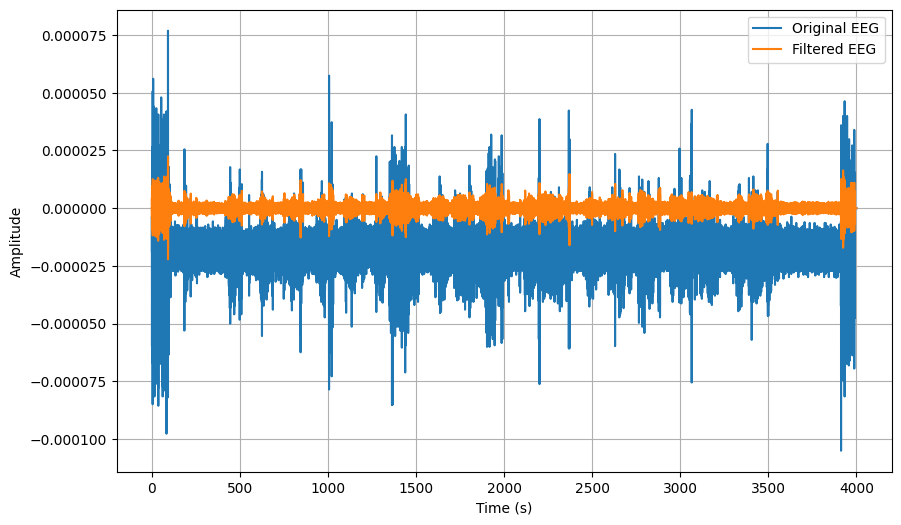

In [29]:
data = sio.loadmat('8EMG_Arm_Kreisbewegung2021.mat')

# EEG verilerine erişin (gerekirse anahtar adını değiştirin)
eeg_data = data['Data']

# Filtreleme parametreleri
fs = 100  # Örnekleme frekansı (saniyede örnek sayısı)
low_freq = 8  # Düşük frekans kesme noktası
high_freq = 12  # Yüksek frekans kesme noktası

# Filtreleme için bandpass filtresi oluşturun
nyquist = 0.5 * fs
low = low_freq / nyquist
high = high_freq / nyquist
b, a = signal.butter(4, [low, high], btype='band')

# Verileri filtreleyin
filtered_data = signal.lfilter(b, a, eeg_data, axis=1)
time = np.arange(eeg_data.shape[1]) / fs

plt.figure(figsize=(10, 6))
plt.plot(time, eeg_data[0], label='Original EEG')
plt.plot(time, filtered_data[0], label='Filtered EEG')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()


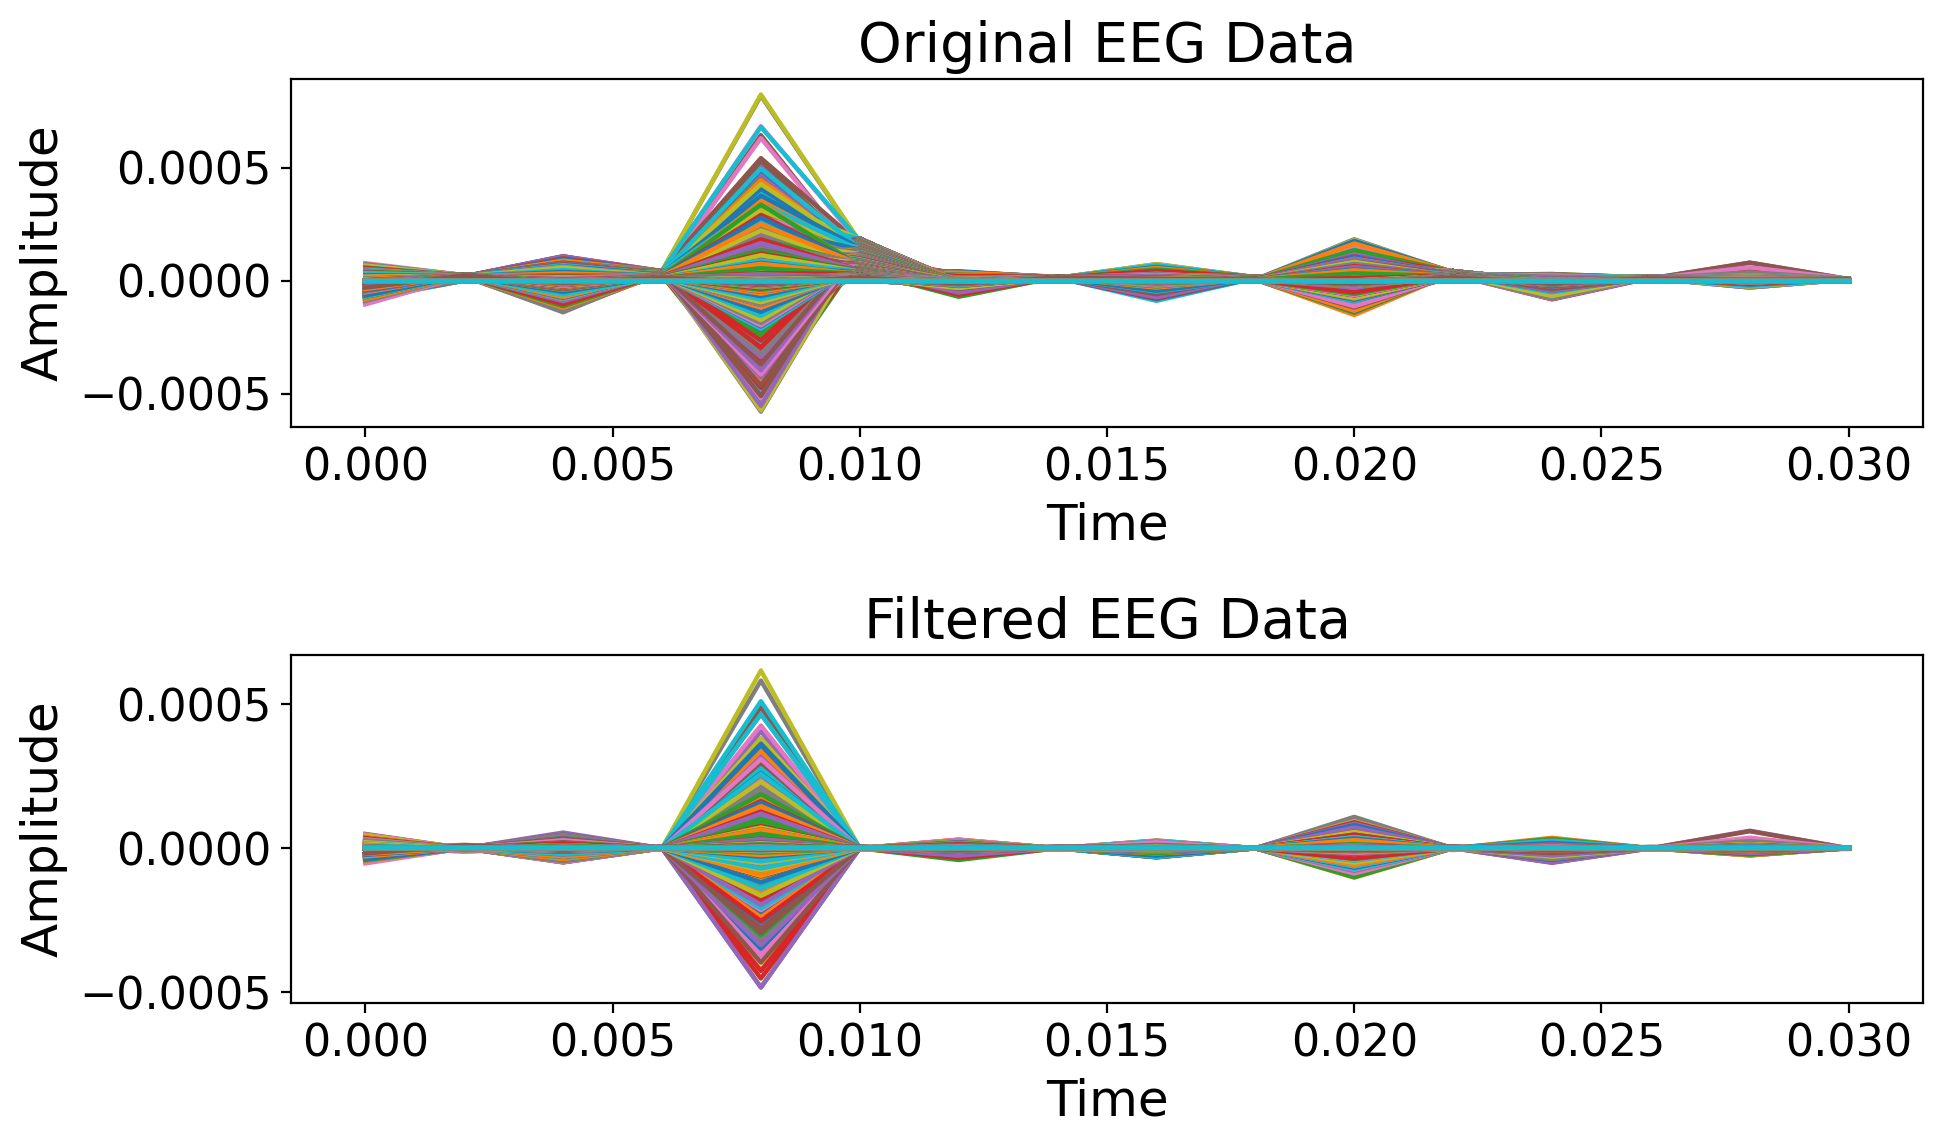

In [19]:
def highpass_filter(data, cutoff_freq, sampling_rate, order=5):
    nyquist_freq = 0.5 * sampling_rate
    normal_cutoff = cutoff_freq / nyquist_freq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    filtered_data = filtfilt(b, a, data)
    return filtered_data


cutoff_freq = 20  # Cut-off frequency in Hz
filtered_data = highpass_filter(eeg_data, cutoff_freq, sampling_rate)
time = np.arange(len(eeg_data)) / sampling_rate

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(time, eeg_data)
plt.title('Original EEG Data')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(time, filtered_data)
plt.title('Filtered EEG Data')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

In [15]:
import numpy as np

# to find channels in the data
num_channels = eeg_data.shape[1]

print("Number of channels:", num_channels)
num_frames = eeg_data.shape[0]

print("Number of frames:", num_frames)

Number of channels: 399960
Number of frames: 16
